# **Unemployment Analysis With Python**

**Author- Samrat Mukherjee**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as sm
from google.colab import drive

In [2]:

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Unemployment Dataset/Unemployment_Rate_upto_11_2020.csv')

In [4]:

data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:

data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [8]:
data.shape

(267, 9)

In [9]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [10]:
import datetime

In [11]:
data[' Date'] = pd.to_datetime(data[' Date'])
data[' Date'] = data[' Date'].dt.strftime('%Y-%m-%d')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [13]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [14]:
data.groupby('Region').size()

Region
Andhra Pradesh      10
Assam               10
Bihar               10
Chhattisgarh        10
Delhi               10
Goa                 10
Gujarat             10
Haryana             10
Himachal Pradesh    10
Jammu & Kashmir      9
Jharkhand           10
Karnataka           10
Kerala              10
Madhya Pradesh      10
Maharashtra         10
Meghalaya           10
Odisha              10
Puducherry          10
Punjab              10
Rajasthan           10
Sikkim               8
Tamil Nadu          10
Telangana           10
Tripura             10
Uttar Pradesh       10
Uttarakhand         10
West Bengal         10
dtype: int64

In [15]:
data.groupby('Region.1').size()

Region.1
East         40
North        79
Northeast    38
South        60
West         50
dtype: int64

In [16]:
import pandas as pd
import plotly.express as px

unemployment = data[['Region.1','Region',' Estimated Unemployment Rate (%)']]

fig = px.sunburst(unemployment, path=['Region.1','Region'], values=' Estimated Unemployment Rate (%)',
                  title= 'Unemployment Rate ', height=600)
fig.show()

In [17]:
# Scatter Plot
scatter_fig = px.scatter(data, x=' Estimated Employed', y=' Estimated Labour Participation Rate (%)', color='Region',
                         title='Scatter Plot: Estimated Employed vs. Estimated Labour Participation Rate')
scatter_fig.show()

<Axes: >

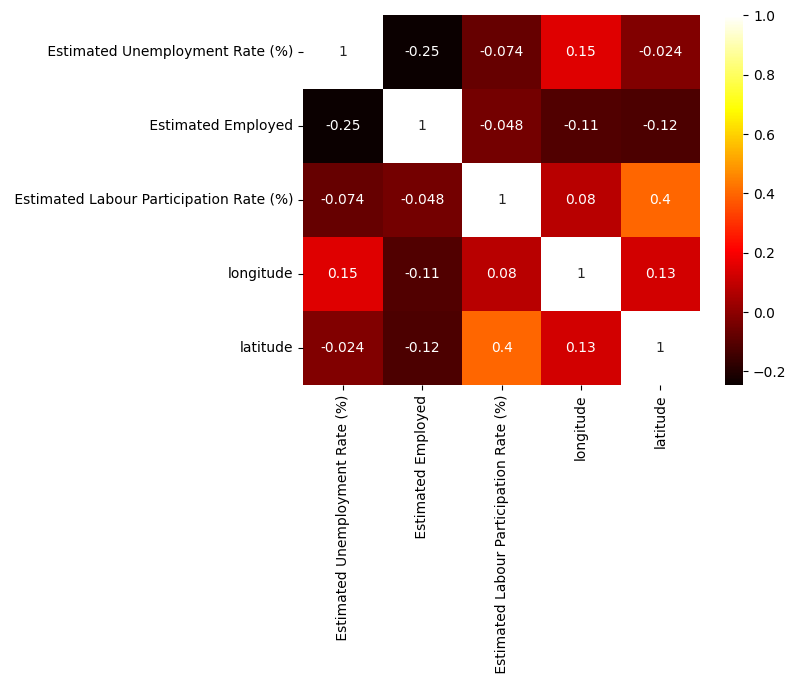

In [18]:
#heatmap
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix,cmap='hot',annot=True)

In [19]:
# Creating a bar plot with descending values and animation
fig = px.bar(data, x='Region.1', y=' Estimated Unemployment Rate (%)',
             title='Unemployment Rate by Region.1', animation_frame=' Date',
             labels={' Estimated Unemployment Rate (%)': 'Unemployment Rate (%)'},
             category_orders={'Region.1': data.groupby('Region.1')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).index},color='Region')

# Sort the bars in descending order
fig.update_layout(barmode='relative')

# Show the figure
fig.show()

In [20]:
fg = px.bar(data,x='Region',y=' Estimated Unemployment Rate (%)',color='Region',title='Unemployment rate',animation_frame=' Date',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()